# UEF spectra handling 

<div class="alert alert-block alert-success">

<li>Soft for conjugated scanning-table and mobile spectrometer control was written by Kudarenko
<li>Transfer optical system (made by Kudarenko) from MSU to UEF, CVD processes, spectra collection were done by Malykhin
<li>Final engineering of the optical system at the UEF - Itkonen
<li>ML, Supervisor, inspirer - Ismagilov

</div>

## Part 2a. Plotting $T_{g}$ distributions by using ML (Random Forest)

<div class="alert alert-block alert-info">
<li>Part 2a cover the case, when for each point {x,y} only the wavelengths <b><i>firstly</i></b> appeared in table are considered.
<li>Part 2b cover the case, when for each point {x,y} <b><i>all</i></b> wavelengths are considered, which give several $T_g$ for comparison.

</div>

In [1]:
# Author: Rinat R. Ismagilov <ismagil@polly.phys.msu.ru>
#
# License: GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
%matplotlib inline

pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format


In [2]:
# nice practice
%reload_ext version_information
# pip install version_information

%version_information numpy, pandas, matplotlib, sklearn, version_information

C:\Anaconda3\envs\rebri_env\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Software versions
Python 3.5.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.18362 SP0
numpy 1.10.1
pandas 0.20.3
matplotlib 3.0.0
sklearn 0.20.0
version_information 1.0.3
Thu Oct 10 16:06:35 2019 RTZ 2 (ceia)

## Macro-tuning parameters
Including spectra path

In [3]:
# I run program at home and at the university
MSU_PC = True
if MSU_PC: 
    diskG = "D:/ZverG/"
else:
    diskG = "G:/"
    
my_rf_path = diskG + "SWAN BAND big data/random_forest_models/"
# my_file = "forest40chMOSTandNoise3add_estim" + str(my_estimators) + "_dep" + str(max_depth) + "T{:0.0f}".format(time.time())
my_file = "forest40chMOSTandNoise3add_estim50_dep50T1540915567"


from _myconfig import *
raw_Kud, raw_Mal, my_fname, rastr
# raw_Kud = "spec_scan_2019_10_01__14-19-20.txt"
# raw_Mal = "MPMA_20191001141917.txt"
# my_fname = "__114_14_19_"
# rastr = (67,113)   # kud_df - last line


('spec_scan_2019_10_10__13-18-06.txt',
 'MPMA_20191010131801.txt',
 '__118_13_18_',
 (55, 99))

## Upload scan data

In [4]:
# recall
scan_df = pd.read_pickle("xy_NoDuble_wl_HaHb_Te"+my_fname+".pkl") #we are using firstly appeared wl
scan_df[["x", "y"]] = scan_df[["x", "y"]].apply(pd.to_numeric)
scan_df = scan_df.sort_values(by=['x','y'])
scan_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b,Te
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,832.101,916.913,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088,646.911,0.544151
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,784.279,981.419,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247,667.960,0.560492
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,918.180,926.128,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821,682.694,0.559786
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,918.180,1027.495,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167,712.163,0.557893
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,989.913,990.635,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626,752.858,0.563924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,28401.428,27922.070,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328,17086.299,0.512846
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,27459.336,27793.059,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984,15107.678,0.514180
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,27650.623,27843.740,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242,16459.035,0.518521
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,26918.949,26936.041,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234,16257.664,0.519468


<div class="alert alert-block alert-warning">
#TODO data engineering = search doubtful data
</div>

## Prepare data for $T_g$ estimates (for previously learned AI  based on Random Forest) 

In [5]:
from utils.pyOESconsts import Consts
from utils.SpectrumModifier import SpectrumModifier
modifier = SpectrumModifier()

In [6]:
wl = np.array(scan_df.columns[2:-4],dtype='float64')
# y = np.array(load_tb.iloc[1:,1:].values,dtype='float64')
intens = np.array(scan_df.iloc[:,2:-4].values,dtype='float64')
wl, intens, wl.shape, intens.shape

(array([ 1922.31,  1929.96,  1937.62, ...,  9546.09,  9553.33,  9560.57]),
 array([[  2.50080000e+01,   5.00160000e+01,  -2.27340000e+01, ...,
           9.93874000e+02,   1.19729400e+03,   1.00074900e+03],
        [  6.36570000e+01,   4.09220000e+01,  -1.13670000e+01, ...,
           1.10333200e+03,   1.14248900e+03,   1.02899600e+03],
        [  5.91100000e+01,   2.27340000e+01,   2.27340000e+01, ...,
           9.76361000e+02,   1.18464700e+03,   1.10163100e+03],
        ..., 
        [  2.97822000e+02,   3.13736000e+02,   2.43259000e+02, ...,
           2.87829530e+04,   2.93716580e+04,   2.94615720e+04],
        [  2.95548000e+02,   3.00095000e+02,   2.22798000e+02, ...,
           2.79029140e+04,   2.83092700e+04,   2.83639790e+04],
        [  2.95548000e+02,   3.16009000e+02,   2.56900000e+02, ...,
           2.69484430e+04,   2.73860020e+04,   2.74842850e+04]]),
 (1024,),
 (5600, 1024))

In [7]:
# 1 masking - working only with Swan Band (0,0)
mask = (wl > 5033.) & (wl < 5220.)
n_rows = intens.shape[0]
mask2D = np.tile(mask, (n_rows,1))
# right boundary is a little bit bigger than for theoretical, because there might be huge shifts. Anyway it will be implicitly cut during standardization step; Left boundary empirically optimized
wl, intens = np.copy(wl[mask]), intens[mask2D].reshape(n_rows,-1).copy()
wl, intens, wl.shape, intens.shape

(array([ 5033.8 ,  5041.32,  5048.83,  5056.35,  5063.87,  5071.38,
         5078.9 ,  5086.41,  5093.93,  5101.44,  5108.95,  5116.47,
         5123.98,  5131.49,  5139.  ,  5146.51,  5154.03,  5161.54,
         5169.05,  5176.56,  5184.07,  5191.58,  5199.08,  5206.59,  5214.1 ]),
 array([[  242.513,   242.276,   260.177, ...,   253.762,   217.494,
           185.266],
        [  261.322,   226.169,   261.518, ...,   240.973,   208.067,
           212.214],
        [  272.071,   242.276,   275.6  , ...,   275.302,   222.88 ,
           189.308],
        ..., 
        [ 3017.636,  2870.396,  2988.012, ...,  2658.784,  2311.628,
          1930.807],
        [ 2932.32 ,  2822.747,  2954.484, ...,  2643.302,  2305.567,
          1886.343],
        [ 2987.406,  2838.854,  2979.294, ...,  2638.591,  2292.774,
          1879.606]]),
 (25,),
 (5600, 25))

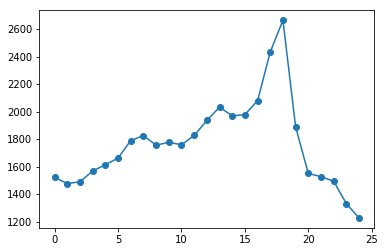

In [8]:
plt.plot(intens[200], "-o")

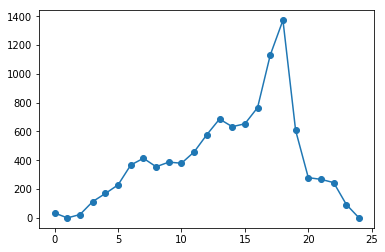

In [9]:
# 2 deTrending - substract the line
for i in np.arange(n_rows):
    intens[i] = modifier.detrend_by_line_from_2left_right_minpoints(wl, intens[i])

wl, intens, wl.shape, intens.shape
plt.plot(intens[200], "-o")

(array([ 5036.        ,  5039.34693878,  5042.69387755,  5046.04081633,
         5049.3877551 ,  5052.73469388,  5056.08163265,  5059.42857143,
         5062.7755102 ,  5066.12244898,  5069.46938776,  5072.81632653,
         5076.16326531,  5079.51020408,  5082.85714286,  5086.20408163,
         5089.55102041,  5092.89795918,  5096.24489796,  5099.59183673,
         5102.93877551,  5106.28571429,  5109.63265306,  5112.97959184,
         5116.32653061,  5119.67346939,  5123.02040816,  5126.36734694,
         5129.71428571,  5133.06122449,  5136.40816327,  5139.75510204,
         5143.10204082,  5146.44897959,  5149.79591837,  5153.14285714,
         5156.48979592,  5159.83673469,  5163.18367347,  5166.53061224,
         5169.87755102,  5173.2244898 ,  5176.57142857,  5179.91836735,
         5183.26530612,  5186.6122449 ,  5189.95918367,  5193.30612245,
         5196.65306122,  5200.        ]),
 array([[ -3.46438517e-02,  -2.37286184e-02,   2.00838064e-02, ...,
           2.20256810e-01,

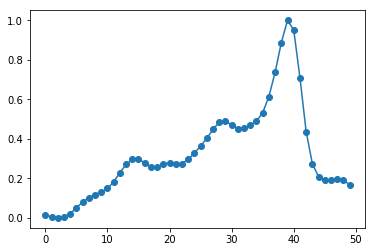

In [10]:
# 3 standardizing - make x grid similar to all spectra (includes interpolation to increase/decrease the number of X,Y points)
       
y_std = np.zeros((n_rows,50), dtype='float64')
for i in np.arange(n_rows):
    x_blind, y_std[i] = modifier.make_standard_xgrid_spectrum(wl, intens[i])
            
    # 4 translation maximum - align to theoretical  5165.2A
    y_std[i] = modifier.translate_OY_along_x_to_merge_lines(x_blind, y_std[i], expected_max=5165.2, max_region=200.,line=Consts.C2_SWAN_BAND['vibr trans (0,0)'])

    # 5 normilize - devide by max C2 intensity
    y_std[i] = modifier.normalize_by_division_with_max_intensity(x_blind, y_std[i])
wl = x_blind
intens = y_std


plt.plot(intens[200], "-o")
wl, intens, wl.shape, intens.shape

In [11]:
# Random forest trained on 40 features
wl, intens = wl[5:45].copy(), intens[:,5:45].copy()
intens[np.isnan(intens)] = 0
wl, intens, wl.shape, intens.shape

(array([ 5052.73469388,  5056.08163265,  5059.42857143,  5062.7755102 ,
         5066.12244898,  5069.46938776,  5072.81632653,  5076.16326531,
         5079.51020408,  5082.85714286,  5086.20408163,  5089.55102041,
         5092.89795918,  5096.24489796,  5099.59183673,  5102.93877551,
         5106.28571429,  5109.63265306,  5112.97959184,  5116.32653061,
         5119.67346939,  5123.02040816,  5126.36734694,  5129.71428571,
         5133.06122449,  5136.40816327,  5139.75510204,  5143.10204082,
         5146.44897959,  5149.79591837,  5153.14285714,  5156.48979592,
         5159.83673469,  5163.18367347,  5166.53061224,  5169.87755102,
         5173.2244898 ,  5176.57142857,  5179.91836735,  5183.26530612]),
 array([[ 0.08163942,  0.10499085,  0.20293483, ...,  0.56531754,
          0.36830568,  0.23142016],
        [ 0.1727029 ,  0.18558729,  0.2430687 , ...,  0.53346959,
          0.32042897,  0.18719767],
        [ 0.12832622,  0.13507427,  0.2013051 , ...,  0.52860955,
        

## Load trained RF model (the @anchor from rnd_forest40ch_clean_and_3noise.ipynb)

In [12]:
import _pickle
with open(my_rf_path+my_file, 'rb') as f:
    rf = _pickle.load(f)

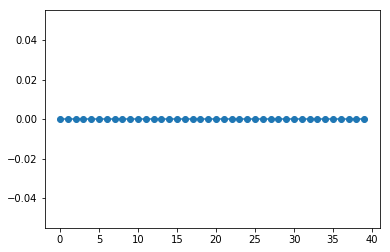

In [13]:
plt.plot(intens[201], "-o")

In [14]:
T_predict = rf.predict(intens)
# T_predict, T_predict.shape

In [15]:
T_predict, T_predict.shape

(array([[ 1670.58,  2054.  ],
        [ 3025.36,  2228.  ],
        [ 2476.86,  2117.  ],
        ..., 
        [ 1393.8 ,  2584.  ],
        [ 1377.84,  2593.  ],
        [ 1472.14,  2340.  ]]), (5600, 2))

In [16]:
scan_df["Trot"] = T_predict[:,0]
scan_df["Tvib"] = T_predict[:,1]
scan_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b,Te,Trot,Tvib
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088,646.911,0.544151,1670.58,2054.0
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247,667.960,0.560492,3025.36,2228.0
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821,682.694,0.559786,2476.86,2117.0
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167,712.163,0.557893,788.22,2050.0
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626,752.858,0.563924,2512.48,2110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328,17086.299,0.512846,1441.30,2428.0
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984,15107.678,0.514180,1604.22,2331.0
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242,16459.035,0.518521,1393.80,2584.0
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234,16257.664,0.519468,1377.84,2593.0


In [17]:
scan_df.to_pickle("xy_NoDuble_wl_HaHb_Te_Tg"+my_fname+".pkl")

## Plot $T_{rot}$ and $T_{vib}$ by loading data from "pkl"

In [18]:
# recall
# raw_Mal = "UEF/MPMA_20190516140603.txt"
scan_df = pd.read_pickle("xy_NoDuble_wl_HaHb_Te_Tg"+my_fname+".pkl")
scan_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b,Te,Trot,Tvib
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088,646.911,0.544151,1670.58,2054.0
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247,667.960,0.560492,3025.36,2228.0
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821,682.694,0.559786,2476.86,2117.0
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167,712.163,0.557893,788.22,2050.0
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626,752.858,0.563924,2512.48,2110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328,17086.299,0.512846,1441.30,2428.0
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984,15107.678,0.514180,1604.22,2331.0
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242,16459.035,0.518521,1393.80,2584.0
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234,16257.664,0.519468,1377.84,2593.0


In [19]:
scan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 11685
Columns: 1032 entries, x to Tvib
dtypes: float64(1031), object(1)
memory usage: 44.1+ MB


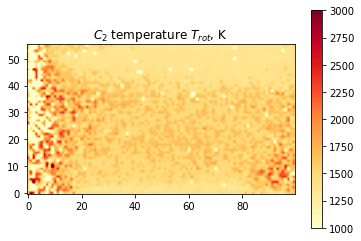

In [20]:
# coord = np.array(scan_df.iloc[:,:2].values,dtype='float64')
# z = scan_df["Trot"].values

z = np.pad(scan_df["Trot"].values,((0,(rastr[0]+1)*(rastr[1]+1)-(scan_df["Trot"].values).shape[0])), 'constant', constant_values = 1) 
Z = z.reshape(int(z.shape[0]/(rastr[1]+1)),-1)


# Z = z.reshape(int(z.shape/(coord[-1,1]+1)),-1)
fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper"
# im = plt.imshow(Z, cmap=plt.cm.RdBu_r, vmin=abs(Z).min(), vmax=abs(Z).max())
im = plt.imshow(Z, cmap=plt.cm.YlOrRd, vmin=1000, vmax=3000, origin="lower")

im.set_interpolation('bilinear')

cb = fig.colorbar(im)

plt.title("$C_2$ temperature $T_{rot}$, K")
plt.savefig("img/Trot"+my_fname+".svg", dpi = 300)
plt.savefig("img/Trot"+my_fname+".png", dpi = 300)

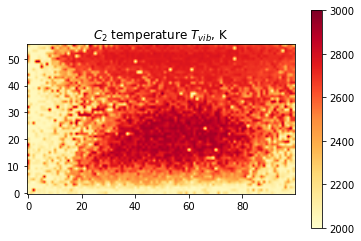

In [21]:
# z1 = scan_df["Tvib"].values
# Z1 = z1.reshape(int(z1.shape/(coord[-1,1]+1)),-1)
z1 = np.pad(scan_df["Tvib"].values,((0,(rastr[0]+1)*(rastr[1]+1)-(scan_df["Tvib"].values).shape[0])), 'constant', constant_values = 1) 
Z1 = z1.reshape(int(z1.shape[0]/(rastr[1]+1)),-1)

fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper"
# im = plt.imshow(Z, cmap=plt.cm.RdBu_r, vmin=abs(Z).min(), vmax=abs(Z).max())
im = plt.imshow(Z1, cmap=plt.cm.YlOrRd, vmin=2000, vmax=3000, origin="lower")

im.set_interpolation('bilinear')

cb = fig.colorbar(im)

plt.title("$C_2$ temperature $T_{vib}$, K")
plt.savefig("img/Tvib"+my_fname+".svg", dpi = 300)
plt.savefig("img/Tvib"+my_fname+".png", dpi = 300)